In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dataset:
It is having investment and profit of 50 Starts up at USA.

In [77]:
Score = pd.read_csv("startupUS.csv")
Score.shape
Score.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [78]:
#preparing the data
X = Score.drop('Profit', axis=1)
y = Score['Profit']
#X.head()
#y.head()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape
#X_test.shape

(40, 3)

In [80]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [81]:
?LinearRegression

In [82]:
#printing parameters:
print(regressor.intercept_)
print(regressor.coef_)

50122.19298986524
[ 0.80571505 -0.02681597  0.02722806]


In [83]:
#making predictions:
y_pred = regressor.predict(X)
y_pred

array([192521.25289008, 189156.76823227, 182147.2790962 , 173696.70002553,
       172139.51418327, 163580.7805712 , 158114.09666865, 160021.36304781,
       151741.69969865, 154884.68410995, 135509.01636714, 135573.71296074,
       129138.05418243, 127487.99166275, 149548.64633453, 146235.1599852 ,
       116915.40540144, 130192.44720781, 129014.2268059 , 115635.21636716,
       116639.6692309 , 117319.45164029, 114706.98171695, 109996.61522126,
       113362.96611314, 102237.72506481, 110600.5753503 , 114408.07145684,
       101660.02600497, 101794.98345176,  99452.37293606,  97687.85627575,
        99001.32898549,  97915.00780465,  89039.27374116,  90511.59956753,
        75286.17458546,  89619.5377079 ,  69697.43064804,  83729.01197692,
        74815.95399105,  74802.55623866,  70620.41182056,  60167.03996335,
        64611.3549157 ,  47650.64968691,  56166.20685261,  46490.58898335,
        49171.38815763,  48215.1341113 ])

In [84]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

,Actual,Predicted
0,192261.83,192521.252890
1,191792.06,189156.768232
2,191050.39,182147.279096
3,182901.99,173696.700026
4,166187.94,172139.514183
5,156991.12,163580.780571
6,156122.51,158114.096669
7,155752.60,160021.363048
8,152211.77,151741.699699
9,149759.96,154884.684110


In [85]:
# The coefficients
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(y, y_pred))

Mean squared error: 78417126.02
R^2 Score: 0.95


In [86]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        08:03:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353     

In [87]:
X2

,const,R&D Spend,Administration,Marketing Spend
0,1.0,165349.20,136897.80,471784.10
1,1.0,162597.70,151377.59,443898.53
2,1.0,153441.51,101145.55,407934.54
3,1.0,144372.41,118671.85,383199.62
4,1.0,142107.34,91391.77,366168.42
5,1.0,131876.90,99814.71,362861.36
6,1.0,134615.46,147198.87,127716.82
7,1.0,130298.13,145530.06,323876.68
8,1.0,120542.52,148718.95,311613.29
9,1.0,123334.88,108679.17,304981.62


ValueError: x and y must be the same size

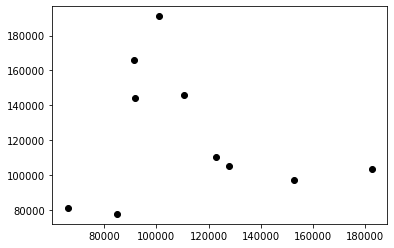

In [88]:
# Plot outputs
plt.scatter(X_test['Administration'], y_test,  color='black')
plt.scatter(X_test['Administration'], y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [89]:
X2['randnos']=np.random.normal(80,100,50)
X2

,const,R&D Spend,Administration,Marketing Spend,randnos
0,1.0,165349.20,136897.80,471784.10,122.848196
1,1.0,162597.70,151377.59,443898.53,224.604258
2,1.0,153441.51,101145.55,407934.54,68.203904
3,1.0,144372.41,118671.85,383199.62,177.954812
4,1.0,142107.34,91391.77,366168.42,124.004389
5,1.0,131876.90,99814.71,362861.36,-1.400186
6,1.0,134615.46,147198.87,127716.82,104.432029
7,1.0,130298.13,145530.06,323876.68,124.627800
8,1.0,120542.52,148718.95,311613.29,68.524493
9,1.0,123334.88,108679.17,304981.62,49.378577


In [75]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     229.2
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           2.68e-29
Time:                        08:52:31   Log-Likelihood:                -524.10
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      45   BIC:                             1068.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.941e+04   6492.671     

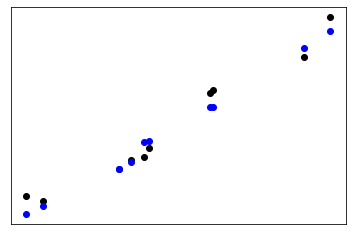

In [27]:
# Plot outputs
plt.scatter(X_test['R&D Spend'], y_test,  color='black')
plt.scatter(X_test['R&D Spend'], y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [28]:
X2

,const,R&D Spend,Administration,Marketing Spend
0,1.0,165349.20,136897.80,471784.10
1,1.0,162597.70,151377.59,443898.53
2,1.0,153441.51,101145.55,407934.54
3,1.0,144372.41,118671.85,383199.62
4,1.0,142107.34,91391.77,366168.42
5,1.0,131876.90,99814.71,362861.36
6,1.0,134615.46,147198.87,127716.82
7,1.0,130298.13,145530.06,323876.68
8,1.0,120542.52,148718.95,311613.29
9,1.0,123334.88,108679.17,304981.62


In [29]:
?sm.OLS

# Example - 2

In [97]:
dataset = pd.read_excel('RegressionExample.xlsx')

In [101]:

dataset['Score']=100-dataset['Score']

In [102]:
dataset

,Score,Interest Level,Hours
0,41,35,30
1,33,33,32
2,46,42,39
3,49,43,39
4,30,24,22
5,52,48,47
6,51,53,57
7,58,56,57
8,49,46,47
9,30,24,22


In [103]:
X = dataset.drop('Score', axis =1 )
y = dataset['Score']

In [104]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     487.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           6.05e-19
Time:                        08:07:16   Log-Likelihood:                -53.300
No. Observations:                  25   AIC:                             112.6
Df Residuals:                      22   BIC:                             116.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.5539      1.087      3.

In [105]:
X = dataset['Interest Level']
Y = dataset['Hours']

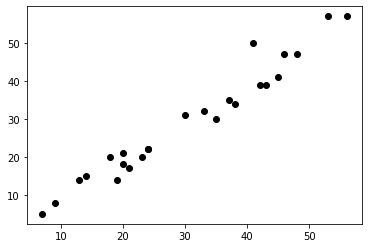

In [106]:
plt.scatter(X, Y,  color='black')
plt.show()

In [107]:
X = dataset['Hours']
y = dataset['Score']

In [108]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.25e-11
Time:                        08:18:31   Log-Likelihood:                -75.576
No. Observations:                  25   AIC:                             155.2
Df Residuals:                      23   BIC:                             157.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4904      2.332      3.640      0.0

# Example -3

In [43]:
dataset = pd.read_excel('RegressionExample.xlsx',sheet_name=1)

In [44]:
dataset

,EducLev,YrHired,Gender,Salary
0,3,92,1,3200.0
1,1,81,0,3910.0
2,1,83,0,3320.0
3,2,87,0,3060.0
4,3,92,1,2900.0
...,...,...,...,...
203,3,61,1,9500.0
204,5,59,1,9700.0
205,5,63,1,8800.0
206,5,60,1,9400.0


In [45]:
X = dataset.drop('Salary', axis =1 )
y = dataset['Salary']

In [46]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     116.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           6.06e-44
Time:                        05:57:07   Log-Likelihood:                -1652.3
No. Observations:                 208   AIC:                             3313.
Df Residuals:                     204   BIC:                             3326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.163e+04    590.602     19.684      0.0

In [50]:
X['randnos2'] = np.random.uniform(10,100,208)

In [51]:
X

,EducLev,YrHired,Gender,randnos,randnos2
0,3,92,1,18.282995,52.702200
1,1,81,0,59.081108,52.587858
2,1,83,0,20.187109,34.556484
3,2,87,0,64.912212,33.402187
4,3,92,1,64.530640,98.828035
...,...,...,...,...,...
203,3,61,1,15.910717,19.416924
204,5,59,1,75.433048,80.413663
205,5,63,1,68.039335,40.398800
206,5,60,1,58.135670,47.028789


In [52]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     71.03
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.26e-42
Time:                        05:59:02   Log-Likelihood:                -1650.6
No. Observations:                 208   AIC:                             3313.
Df Residuals:                     202   BIC:                             3333.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.172e+04    596.311     19.659      0.0